# 1. Introduction

<!-- Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai. -->
## Graded Challange 7

```
Nama        : Reski Hidayat
Batch       : HCK-015

Objective   :
This program is made to predict and detected picture Smoking and Not Smoking by using data inference

```

# 2. Import Libraries

In [76]:
# Import Libraries
import os

import pandas as pd
import numpy as np 
import tensorflow as tf 

import os
import random
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Definisikan jalur pengujian
test_path = 'D:/HCK015/Phase 2/Week 1/GC 7/p2-ftds015-hck-g7-Reaumurr/input/smoking/Testing'

In [82]:
# Definisikan generator gambar pengujian tanpa target_size
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

# Muat data pengujian dari direktori dengan target_size yang sesuai
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(220, 220),  # Ini tetap diperlukan di sini
                                            class_mode='binary',
                                            batch_size=64,
                                            shuffle=False,
                                            seed=2)

Found 224 images belonging to 2 classes.


# 3. Model Loading

In [83]:
# load model
model_final= load_model('model.keras')

# 4. Model Inference & Predicting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


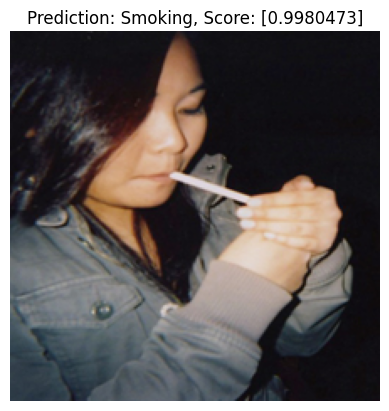

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


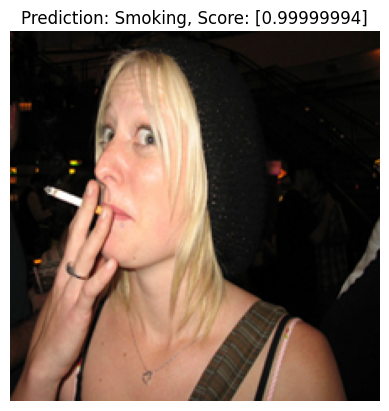

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


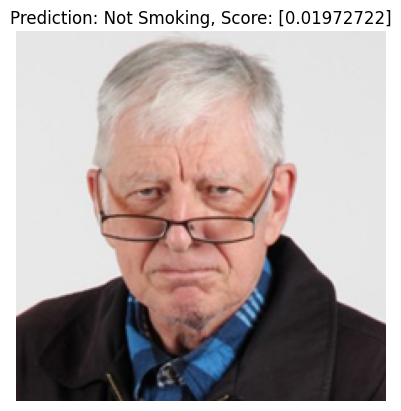

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


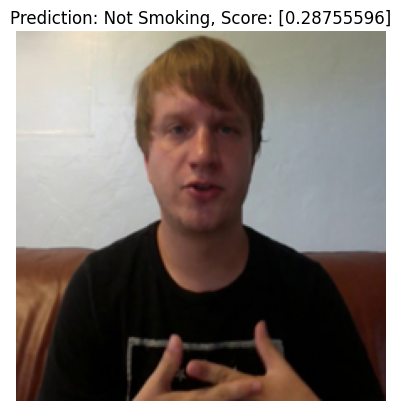

In [90]:
# Ambil 5 gambar acak dari masing-masing kelas
num_images = 2
random_smoking_images = random.sample(os.listdir(os.path.join(test_path, 'Smoking')), num_images)
random_not_smoking_images = random.sample(os.listdir(os.path.join(test_path, 'Not Smoking')), num_images)

# Lakukan prediksi untuk gambar-gambar tersebut
for image_name in random_smoking_images + random_not_smoking_images:
    image_path = os.path.join(test_path, 'Smoking', image_name) if image_name in random_smoking_images \
        else os.path.join(test_path, 'Not Smoking', image_name)
    
    # Baca gambar dan sesuaikan ukurannya
    img = Image.open(image_path)
    img = img.resize((220, 220))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Lakukan prediksi
    prediction = model_final.predict(img_array)
    predicted_class = "Smoking" if prediction > 0.5 else "Not Smoking"
    
    # Tampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}, Score: {prediction[0]}")
    plt.axis('off')
    plt.show()
